In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import cufflinks as cf
from collections import Counter
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle
import time

In [ ]:
 # Reading data from local file
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
"""
Counting the missing data over each feature respectively,over here the missing data 
is in the form of " ?" instead of null values.
"""
data.isin([" ?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [ ]:
# The anamolous data values like "?" has been replaced by the mode value of that 
# particular coloumn.

data['workclass'] = data['workclass'].replace(" ?",data['workclass'].mode()[0])
data['occupation'] = data['occupation'].replace(" ?",data['occupation'].mode()[0])
data['country'] = data['country'].replace(" ?",data['country'].mode()[0])

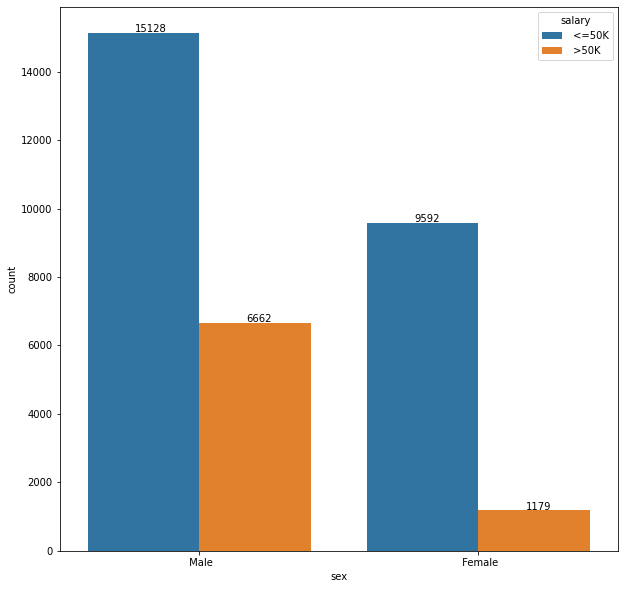

In [ ]:
"""
The Categories of Salary based on the Gender of the people.
"""
plt.figure(figsize = (10,10))
based_on_sex = sns.countplot(data = data, x = 'sex',hue = 'salary')

for i in based_on_sex.patches:
    based_on_sex.annotate((i.get_height()),(i.get_x() + 0.17,i.get_height() + 20))

In [ ]:
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
"""
Unqiue eductaional qualifications of people in the dataset.
"""

education_data = data['education'].value_counts(normalize = True)
education_data

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

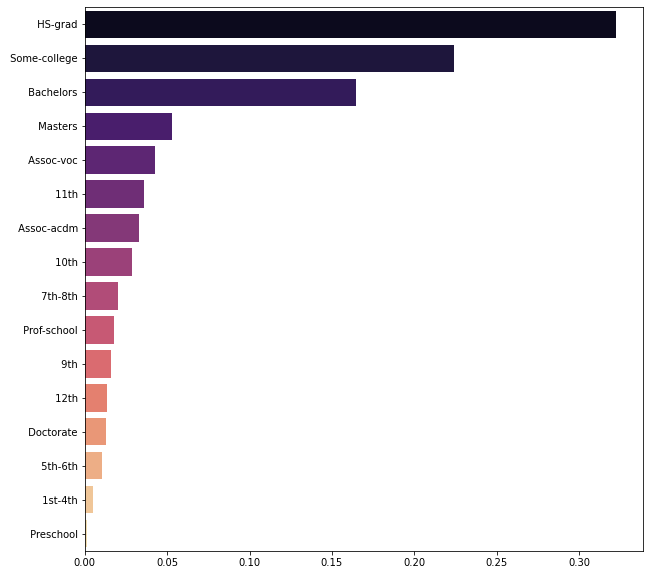

In [ ]:
"""
  The barplot of the number of people who have their highest degree in the above mentioned qualifications.
"""
plt.figure(figsize = (10,10))
based_on_education = sns.barplot(x = education_data.values,y = education_data.index,palette = 'magma')   

Thus most of the people are from HS Grade followed by the some college and the bachelors

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data['marital-status'].nunique()  #There are 7 unique Marital status in the given dataset.

7

In [ ]:
marital_status = data['marital-status'].value_counts(normalize = True).apply(lambda x:x*100)   #Converted to the percentage.

From the above we can see that most of the people are Married-civ-spouse and followed by the Never-married people.

In [ ]:
data['occupation'].unique()   #Unique occupations of people in the dataset.

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
"""
Count of people distributed in different occupation classes.
"""

occupation_data = data['occupation'].value_counts()
occupation_data

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

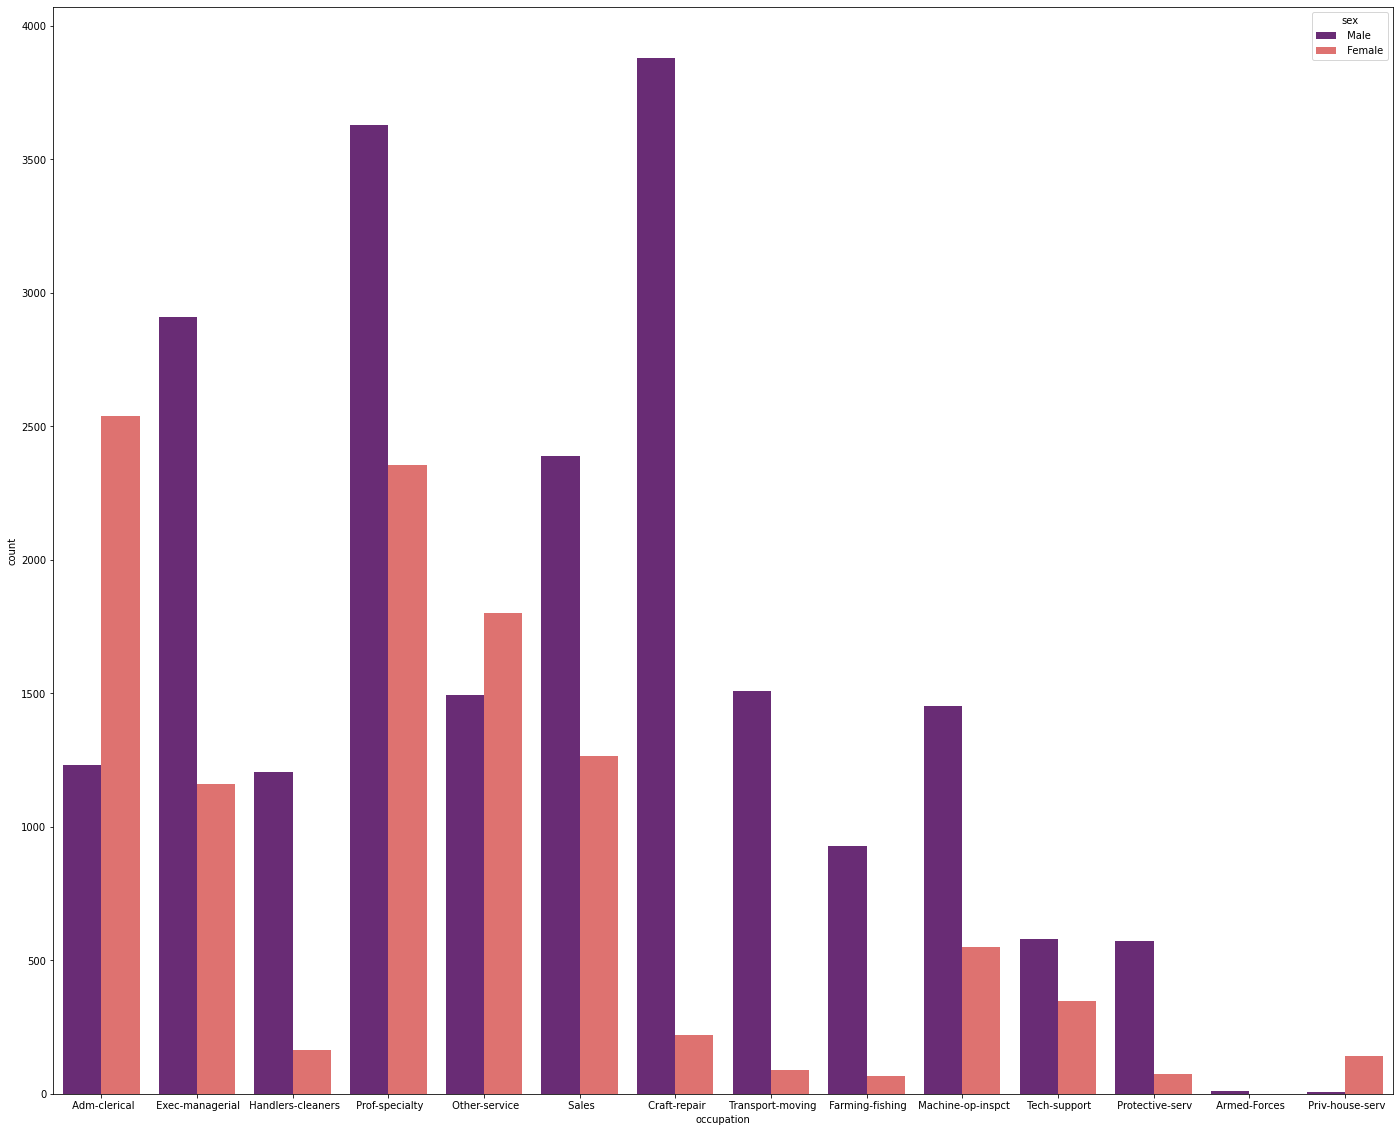

In [ ]:
"""
The count of people having different occupations and are categorized based on their gender.

"""
plt.figure(figsize = (24,20))
sns.countplot(data = data,x = 'occupation',hue = 'sex',palette = 'magma')

Most of the Males are working in the Craft-repair line and most of the Females are working in the Adm-Clerical line.

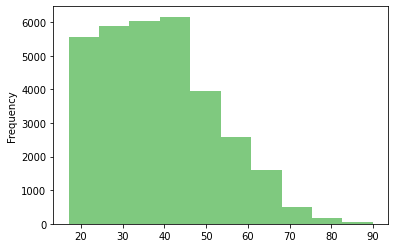

In [ ]:
"""
To find the average age of people in the dataset.
"""
data['age'].plot(kind = 'hist',colormap = 'Accent')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'The Average age group is 39 Years approx.')

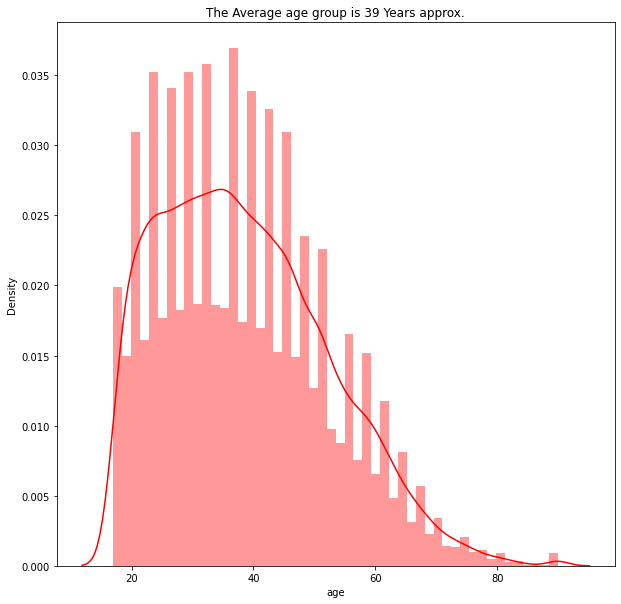

In [ ]:
"""
The Maximum number of people are distributed in age group between 30 and 50 years.
So the average age of the people in the dataset is about 39 years.
"""
plt.figure(figsize = (10,10))
sns.distplot(data['age'],color = 'red')
plt.title("The Average age group is 39 Years approx.")

The Average age of the population is around 39 Years.

**Income with respect to the Race**

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

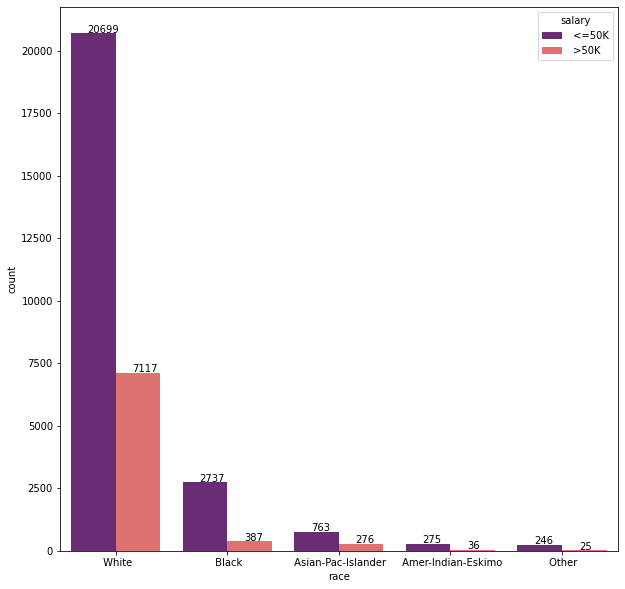

In [ ]:
"""
Visualizing Categories of the Income based on the Race in which the people belong.
"""
plt.figure(figsize = (10,10))
raceplot = sns.countplot(data = data,x = 'race',hue = 'salary',palette = 'magma')

for p in raceplot.patches:
    raceplot.annotate((p.get_height()),(p.get_x()+0.15,p.get_height()+20))

# Most of the people in all the available Races are earning less than 50K.

From the above plot => most of the people irrespective of race are earning less than 50k.

**Income based on the educational qualification:**

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


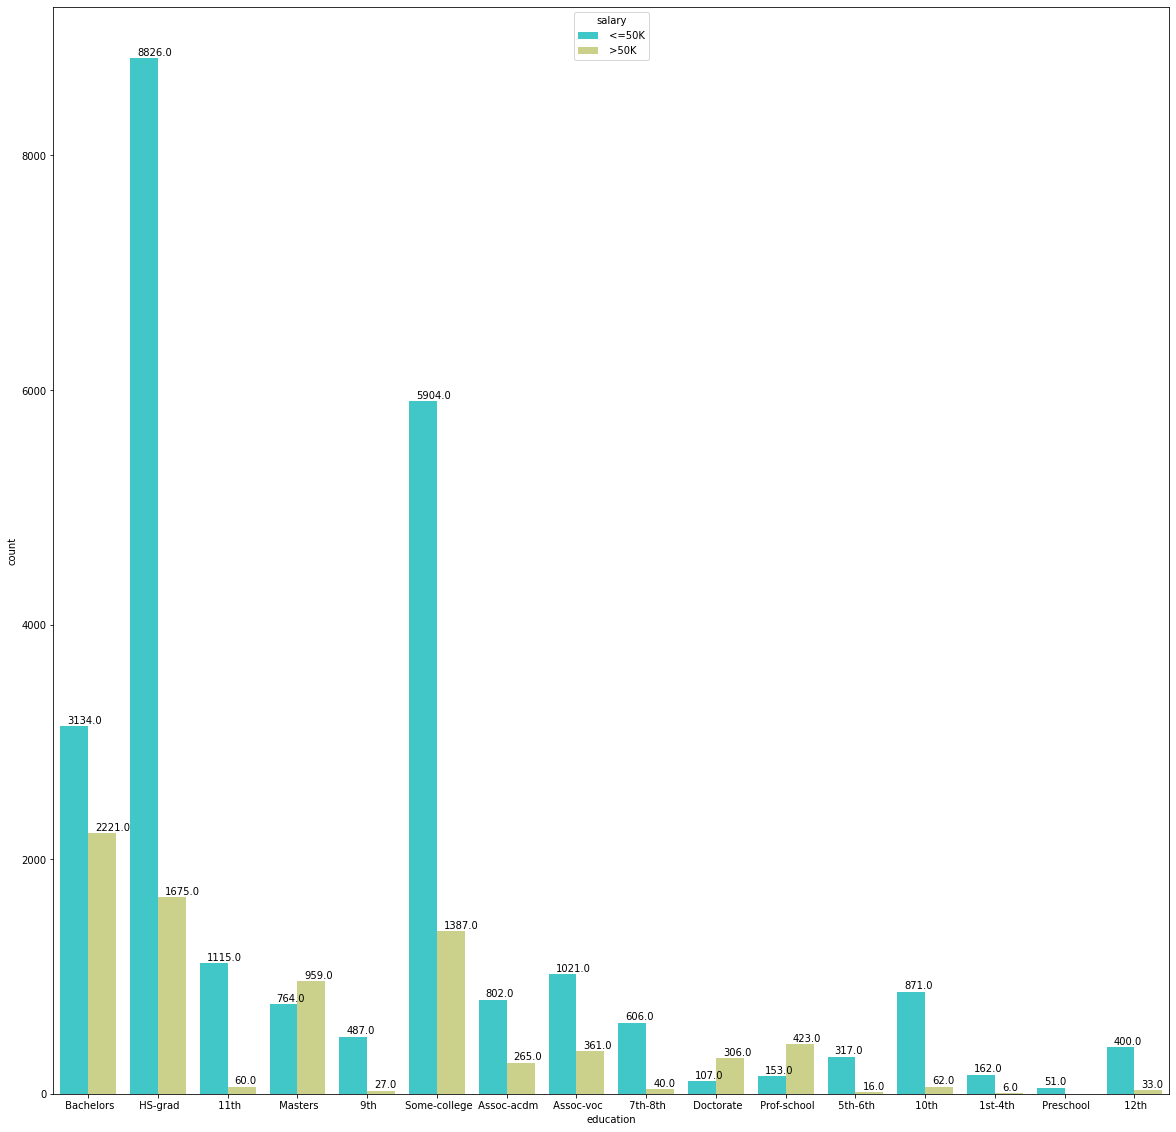

In [ ]:
"""
Visualizing Salary categories based on the educational qualification of the people in the dataset.
"""
plt.figure(figsize = (20,20))
based_education = sns.countplot(x = data['education'],hue = data['salary'],palette = 'rainbow')

for i in based_education.patches:
    based_education.annotate((i.get_height()),(i.get_x()+0.1,i.get_height() + 25))

**Based on the Marital status**

In [ ]:
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


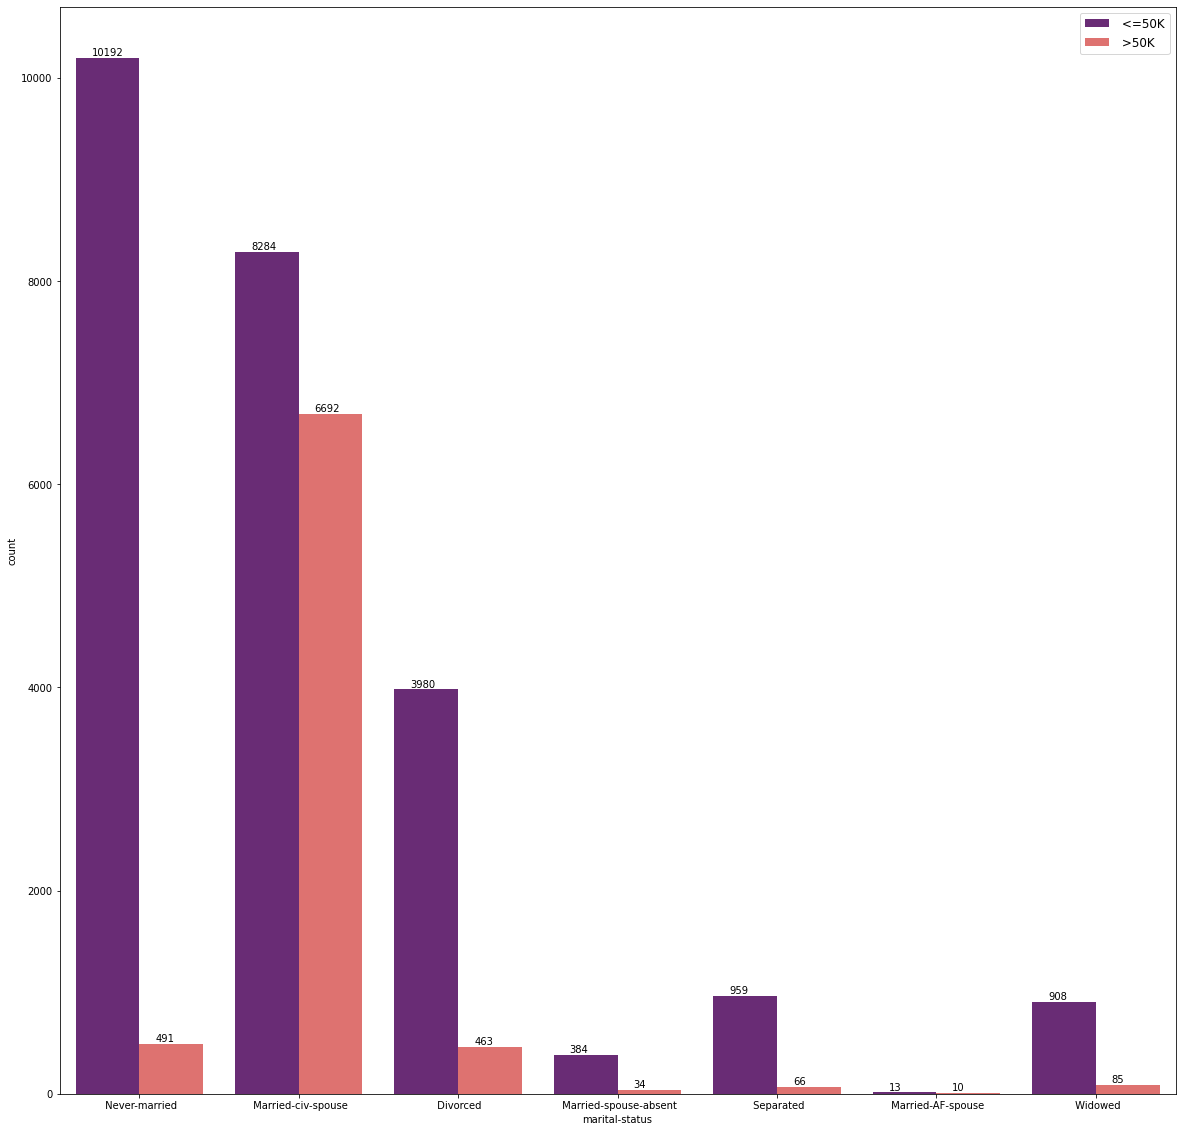

In [ ]:
"""
Visualizing Categories of Salary based on the Marital-status of the people in the dataset.
"""
plt.figure(figsize = (20,20))
based_marital = sns.countplot(x = data['marital-status'],hue = data['salary'],palette = 'magma')
plt.legend(fontsize = 'large')

for j in based_marital.patches:
    based_marital.annotate((j.get_height()),(j.get_x() + 0.1,j.get_height() + 25))

**Based on the Occupation**

In [ ]:
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


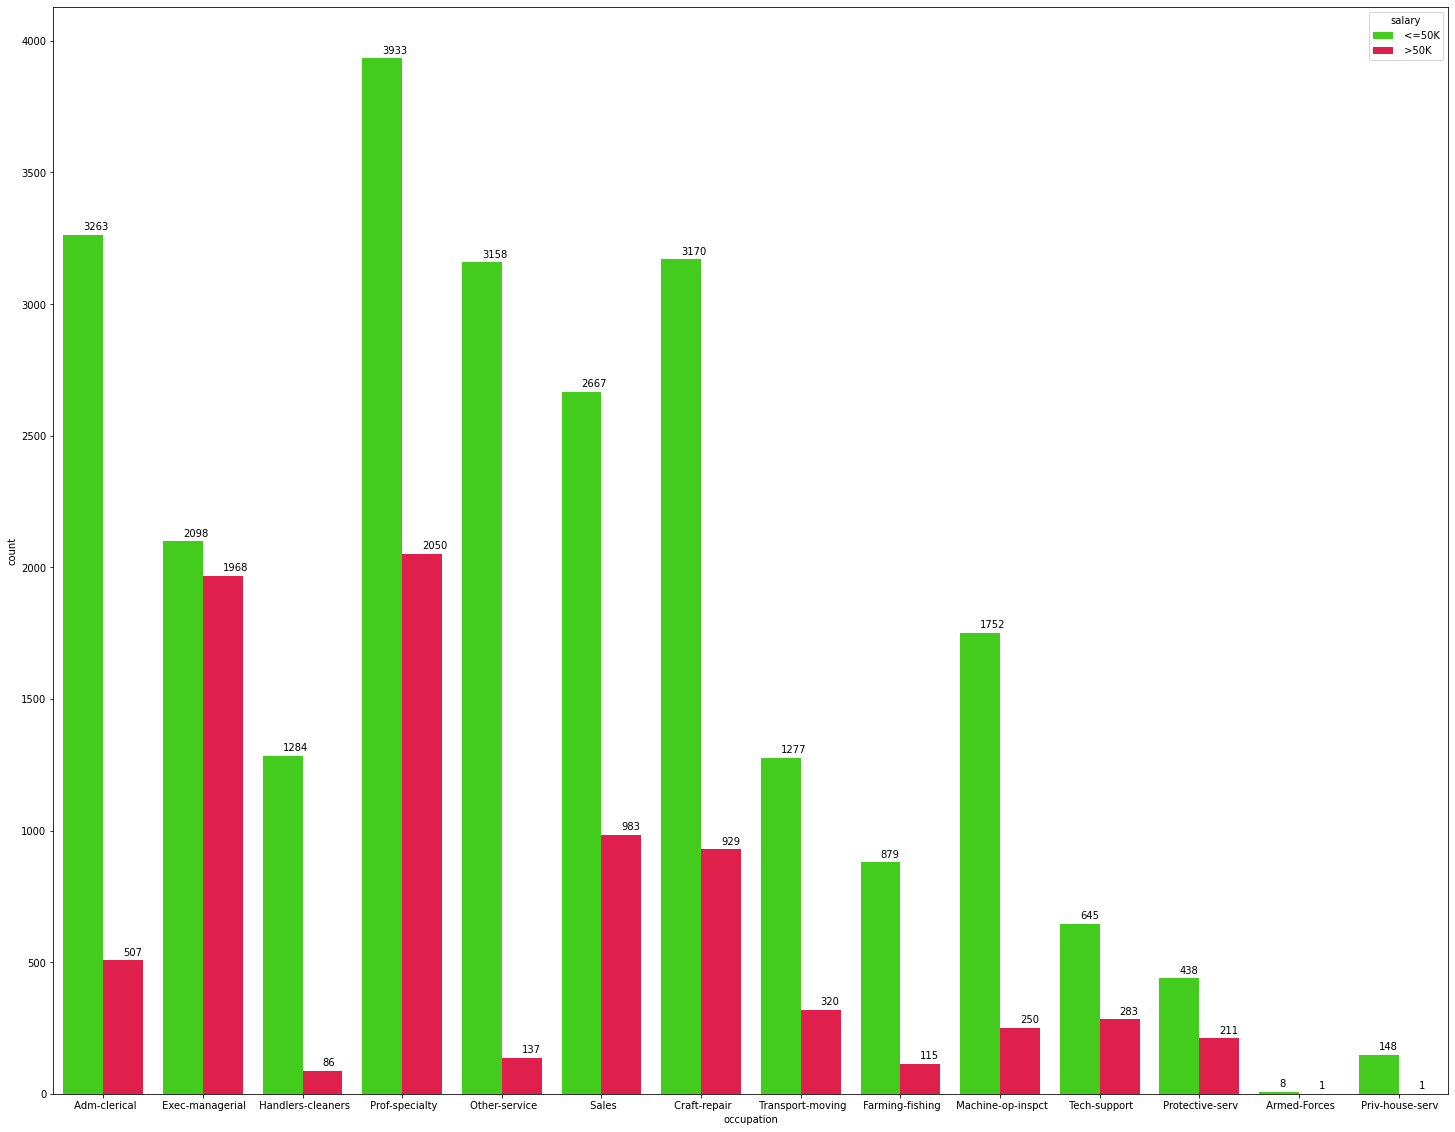

In [ ]:
"""
Visualizing Categories of Salary based on the occupation of the people in the dataset.
"""
plt.figure(figsize = (25,20))
based_occupation = sns.countplot(x = data['occupation'],hue = data['salary'],palette = 'prism')

for i in based_occupation.patches:
    based_occupation.annotate((i.get_height()),(i.get_x() + 0.20,i.get_height() + 20))

The more number of people working in the ADM_clerical is earning less than 50k and the most number of people earning more than 50K are working in the Exec-Managerial.

**Based on Workclass:**

In [ ]:
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


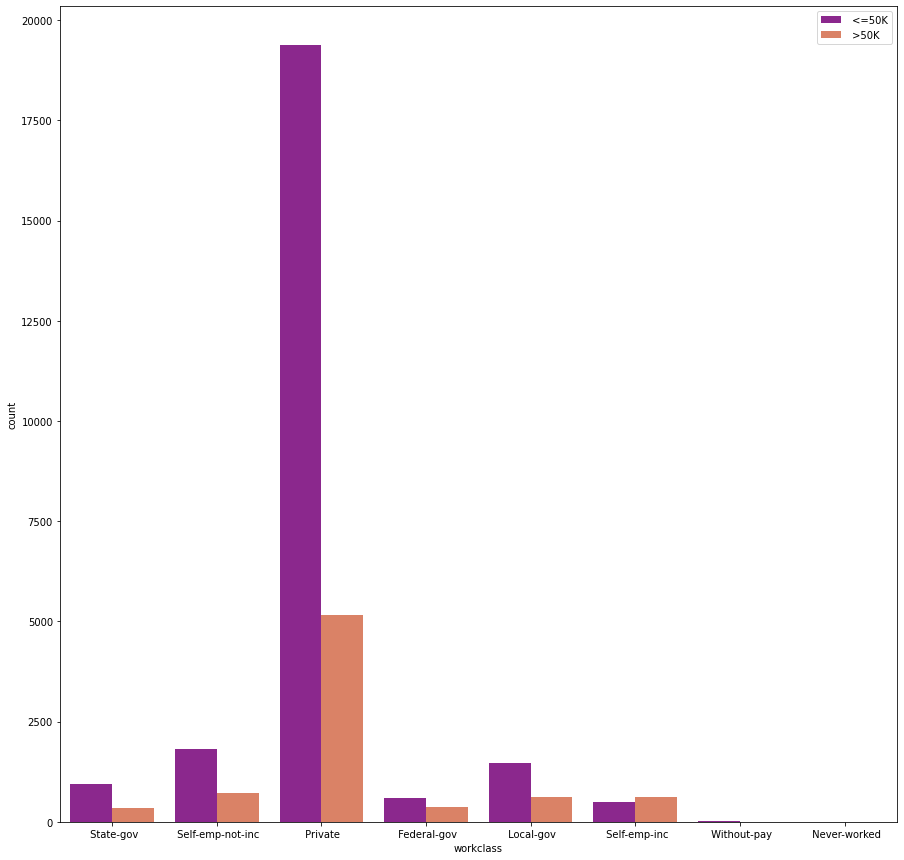

In [ ]:
"""
Category of Salary based on the Working class of the people mentioned in the Dataset.
"""
plt.figure(figsize = (15,15))
sns.countplot(x = data['workclass'],hue = data['salary'],palette = 'plasma')
plt.legend(loc = 'upper right')

Most of the Earning people are from the Private Workclass

**Based on Hours per week:**

In [ ]:
data['hours-per-week'].mean()  #The average working hours of the people is about 40.5 hours.

40.437455852092995

The Average working hours of an individual is 40.43 hours

In [ ]:
data['hours-per-week'].iplot(kind = 'hist',theme = 'White')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
# Dropping education feature as education-num is the ordinal encoded feature of education feature
data.drop('education',axis=1,inplace=True)

In [ ]:
df=data

In [ ]:
# Mean encoding the features having many categories
# Categories include
# Race  
Mean_encoded_subject = df.groupby(['race'])['salary'].mean().to_dict()
df['race'] =  df['race'].map(Mean_encoded_subject)
# marital-status
Mean_encoded_subject = df.groupby(['marital-status'])['salary'].mean().to_dict()
df['marital-status'] =  df['marital-status'].map(Mean_encoded_subject)
# relationship
Mean_encoded_subject = df.groupby(['relationship'])['salary'].mean().to_dict()
df['relationship'] =  df['relationship'].map(Mean_encoded_subject)
# workclass
Mean_encoded_subject = df.groupby(['workclass'])['salary'].mean().to_dict()
df['workclass'] =  df['workclass'].map(Mean_encoded_subject)
# country
Mean_encoded_subject = df.groupby(['country'])['salary'].mean().to_dict()
df['country'] =  df['country'].map(Mean_encoded_subject)
# occupation
Mean_encoded_subject = df.groupby(['occupation'])['salary'].mean().to_dict()
df['occupation'] =  df['occupation'].map(Mean_encoded_subject)

In [ ]:
# One hot encoding the sex feature as the input to the machine learning model can only
# be numerical 
df1=pd.get_dummies(df['sex'],drop_first=True)
df= pd.concat([df1, df], axis=1)
df.drop('sex',axis=1,inplace=True)

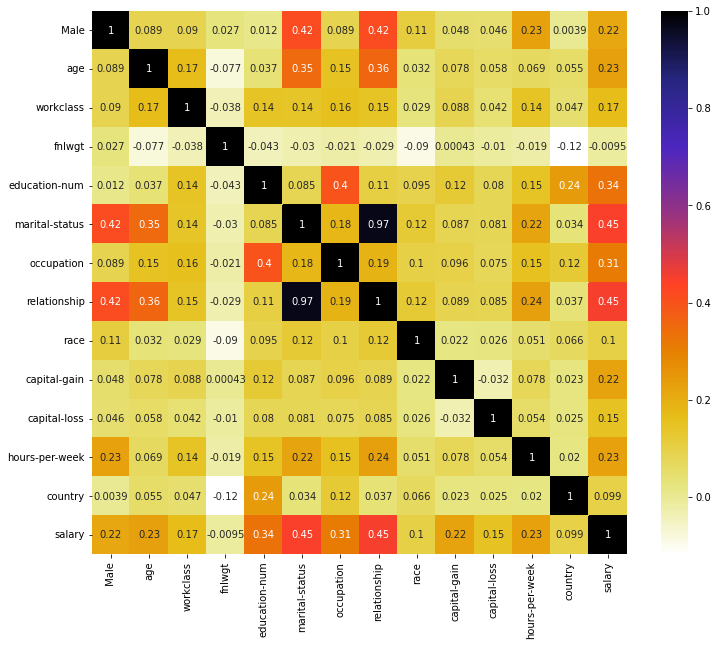

In [ ]:
"""
Using Pearson Correlation to see the mutual relationship of features with 
other features and output label
"""
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
    

In [ ]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

1

In [ ]:
corr_features

{'relationship'}

In [ ]:
"""
We can see that from the above figure and the above function features relationship and 
marital-status have a strong correleation so we can remove one of the features as it 
may result to overfitting.
We are also removing fnlwgt has it has almost 0 correlation to output label
"""
df.drop(['relationship','fnlwgt'],axis=1,inplace=True)

In [ ]:
x=df.drop('salary',axis = 1)
y = df['salary']
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [ ]:
y_train.value_counts()/len(y_train)

0    0.758336
1    0.241664
Name: salary, dtype: float64

In [ ]:
"""
From this we can infer that 75 percent of the records have  output value as 1 and only 25 percent
records have output value as 0 to eleminate this imbalance we have gone for augmentation method
"""
from imblearn.combine import SMOTETomek
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 17284, 1: 5508})
After Counter({0: 16795, 1: 16795})


In [ ]:
# Concatenating the augmented label and features into dataframe
df1= pd.concat([x_train_smtom, y_train_smtom], axis=1)

In [ ]:
x = df1.drop(['salary'], axis=1)
y = df1['salary']
# Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=101)

In [ ]:
# Using Kfold cross validation to find the best machine learning model and trying to 
# avoid overfitting 
# Random Forest
start = time.time()
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),x,y, cv=10)
end = time.time()
eval_time = end-start
print('Estimated time for Random Forest Algorithm is',eval_time)
print('Accuracy of Random Forest Algorithm is',np.average(scores1))

Estimated time for Random Forest Algorithm is 1.748570203781128
Accuracy of Random Forest Algorithm is 0.8921702887764216


In [ ]:
# AdaBoost classifier
start = time.time()
scores1 = cross_val_score(AdaBoostClassifier(n_estimators=200, base_estimator= None,learning_rate=0.1, 
                                             random_state = 1),x,y, cv=10)
end = time.time()
eval_time = end-start
print('Estimated time for AdaBoost Algorithm is',eval_time)
print('Accuracy of AdaBoost Algorithm is',np.average(scores1))

Estimated time for AdaBoost Algorithm is 43.30741620063782
Accuracy of AdaBoost Algorithm is 0.8601369455194998


In [ ]:
# KNN algorithm
start = time.time()
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=3),x,y, cv=10)
end = time.time()
eval_time = end-start
print('Estimated time for Knn Algorithm is',eval_time)
print('Accuracy of Knn Algorithm is',np.average(scores1))

Estimated time for Knn Algorithm is 3.9946608543395996
Accuracy of Knn Algorithm is 0.869663590354272


In [ ]:
# Hyper parameter tuning for Random Forest
n_estimators = [int(x) for x in np.linspace(40,150,num = 15)]
max_depth = [int(x) for x in np.linspace(40,150,num = 15)]

params = {'n_estimators': n_estimators,
         'max_depth': max_depth}

randforest = RandomForestClassifier(random_state = 101)

random_search = RandomizedSearchCV(estimator = randforest,cv = 5, param_distributions = params,random_state = 101)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=101)

In [ ]:
# Best parameters
random_search.best_params_

{'max_depth': 142, 'n_estimators': 102}

In [ ]:
# Accuracy
random_search.best_score_

0.9027238400221567

In [ ]:
# Fitting model to dataset
regressor = RandomForestClassifier(n_estimators=65,max_depth=None)
regressor.fit(x_train,y_train)
prediction = regressor.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test,prediction))
print(f1_score(y_test,prediction))

0.9068175052098839
0.9073416222616933


In [ ]:
"""
From the above process we have identified Random Forest as the best algorithm
with respect to accuracy and time therefore we use Random Forest to create a pickle
file for flask app creation
"""
pickle.dump(regressor, open('model.pkl','wb'))